In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib notebook

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist= input_data.read_data_sets("MNIST_data/", one_hot =True)

nb_classes =10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
X=tf.placeholder(tf.float32,shape=[None ,784])
#Y=tf.placeholder(tf.float32, shape=[None,3])
Y=tf.placeholder(tf.float32, shape=[None,nb_classes])   #shape = (?,10)

In [11]:
#두개의 traing 을 위한 변수 선언
W= tf.Variable(tf.random_normal([784,nb_classes]),name='weight')
b= tf.Variable(tf.random_normal([nb_classes]),name='bias')

In [12]:
logits=tf.matmul(X,W)+b
hypothesis = tf.nn.softmax(logits)

In [13]:
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

In [8]:
#test model
is_correct= tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
#accuracy 계산
accuracy= tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [14]:
#Minimize
Optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.01)
train= Optimizer.minimize(cost)

Label: [5]
Prediction: [0]


<IPython.core.display.Javascript object>


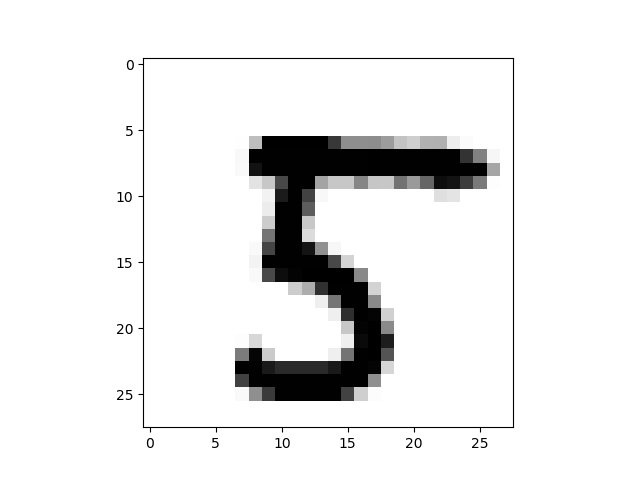

In [21]:
training_epochs =15
batch_size =100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost =0
        total_batch= int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs,batch_ys= mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,train], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost +=  c/ total_batch
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), 
                      feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

